# Study MNIST using LR, RF

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

## Try the digits dataset first

In [35]:
from sklearn.datasets import load_digits

In [36]:
digits = load_digits()

In [37]:
digits.data.shape

(1797, 64)

In [38]:
digits.target.shape

(1797,)

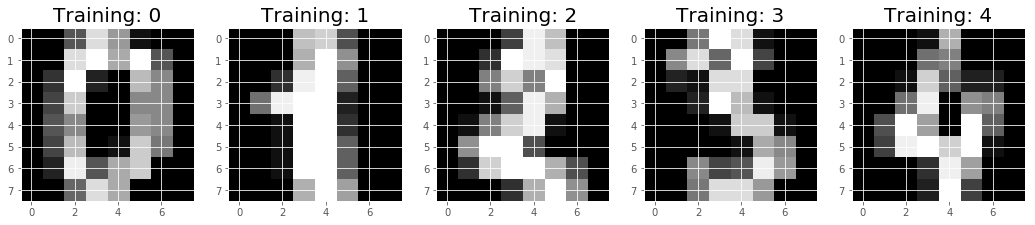

In [39]:
fig, ax = plt.subplots(1, 5, figsize=(18,4))

for i in range(5):
    ax[i].imshow(np.reshape(digits.data[i], (8, 8)), cmap=plt.cm.gray)
    ax[i].set_title('Training: %i' % digits.target[i], fontsize=20)

plt.show()

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=0)

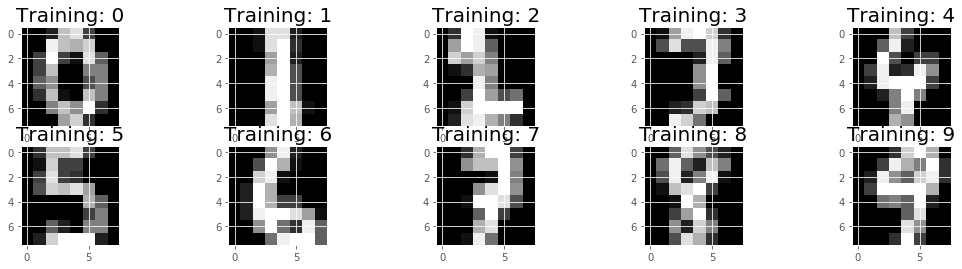

In [41]:
fig, ax = plt.subplots(2, 5, figsize=(18,4))
ax = ax.flatten()
for i in range(10):
    ax[i].imshow(np.reshape(X_train[y_train==i][0], (8, 8)), cmap=plt.cm.gray)
    ax[i].set_title('Training: %i' % i, fontsize=20)

plt.show()

In [42]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(C=1.0, penalty='l2')

In [43]:
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [44]:
y_train_pred = clf.predict(X_train)
p_train_pred = clf.predict_proba(X_train)

y_test_pred = clf.predict(X_test)
p_test_pred = clf.predict_proba(X_test)

In [45]:
p_train_pred.shape

(1437, 10)

In [46]:
from sklearn.metrics import accuracy_score

In [47]:
acc_train = clf.score(X_train, y_train)

In [48]:
acc_train

0.9958246346555324

In [49]:
acc_test = clf.score(X_test, y_test)
acc_test

0.95

In [50]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_test_pred)

cm

array([[27,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 31,  0,  0,  0,  0,  1,  0,  3,  0],
       [ 0,  0, 34,  2,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 29,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 30,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 39,  0,  0,  0,  1],
       [ 0,  1,  0,  0,  0,  0, 43,  0,  0,  0],
       [ 0,  1,  0,  0,  1,  0,  0, 37,  0,  0],
       [ 0,  2,  1,  0,  0,  0,  0,  0, 35,  1],
       [ 0,  0,  0,  1,  0,  1,  0,  0,  2, 37]], dtype=int64)

In [51]:
print(clf)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [52]:
from sklearn import metrics

print(metrics.classification_report(y_train, y_train_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       151
          1       0.99      0.99      0.99       147
          2       1.00      1.00      1.00       141
          3       0.99      1.00      0.99       154
          4       1.00      1.00      1.00       151
          5       1.00      1.00      1.00       142
          6       1.00      1.00      1.00       137
          7       1.00      1.00      1.00       140
          8       0.98      0.99      0.98       135
          9       1.00      0.98      0.99       139

avg / total       1.00      1.00      1.00      1437



Define a function to plot the confusion matrix for better visulization

In [34]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    #plt.figure(figsize=(20, 4))
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


Confusion matrix, without normalization


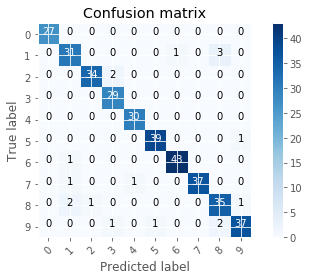

In [64]:
plot_confusion_matrix(cm, [i for i in range(10)])

## MNIST

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [11]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

In [12]:
print(mnist.data.shape)
print(mnist.target.shape)

(70000, 784)
(70000,)


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=1/7, random_state=0)

print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [14]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

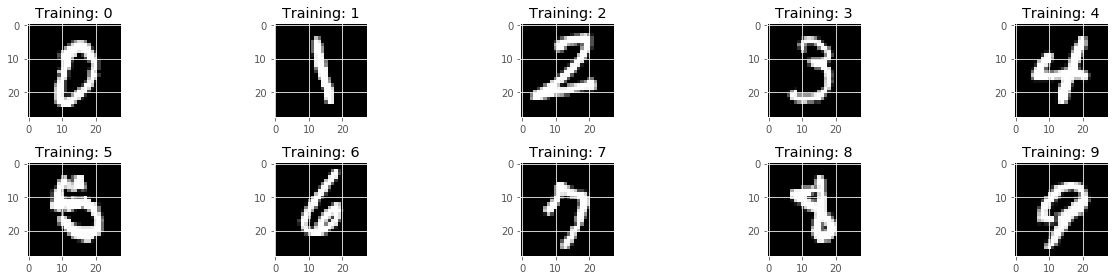

In [15]:
fig, ax = plt.subplots(2, 5, figsize=(18, 4))
ax = ax.flatten()

for i in range(10):
    ax[i].imshow(np.reshape(X_train[y_train == i][0], (28, 28)), cmap='Greys_r')
    ax[i].set_title('Training: %i' % i)

fig.tight_layout()
plt.show()

### Logistic regression

In [16]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=1.0, penalty='l2')

In [17]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [22]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)
acc_train = lr.score(X_train, y_train)
acc_test = lr.score(X_test, y_test)
acc_train, acc_test

(0.9286666666666666, 0.9166)

In [25]:
from sklearn.metrics import confusion_matrix, classification_report

In [26]:
print(classification_report(y_train, y_train_pred))

             precision    recall  f1-score   support

        0.0       0.96      0.98      0.97      5967
        1.0       0.95      0.98      0.97      6714
        2.0       0.93      0.91      0.92      6008
        3.0       0.91      0.90      0.91      6103
        4.0       0.93      0.94      0.93      5876
        5.0       0.90      0.89      0.89      5392
        6.0       0.95      0.96      0.96      5863
        7.0       0.94      0.94      0.94      6264
        8.0       0.89      0.88      0.89      5847
        9.0       0.91      0.89      0.90      5966

avg / total       0.93      0.93      0.93     60000



Confusion matrix, without normalization
[[5845    2   10    8    8   20   25    8   36    5]
 [   1 6578   27   12    3   22    7   12   45    7]
 [  36   49 5474   78   64   24   53   64  147   19]
 [  26   23  131 5503   11  150   23   53  122   61]
 [  12   23   31   10 5532    7   29   10   52  170]
 [  51   25   22  164   57 4786   96   17  119   55]
 [  30   16   34    4   28   85 5632    1   32    1]
 [  16   27   69   17   59    8    3 5899   17  149]
 [  44  119   62  127   34  161   45   29 5138   88]
 [  33   28   17   96  173   41    3  189   53 5333]]


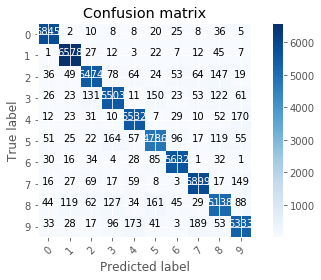

In [35]:
cm_train = confusion_matrix(y_train, y_train_pred)
plot_confusion_matrix(cm_train, [i for i in range(10)])

### Random forest

In [36]:
from sklearn.ensemble import RandomForestClassifier

parameters = {'n_estimators': 100,
              'max_depth': 20,
              'max_features': 'auto',
              'min_samples_leaf': 10,
              'random_state': 0,
              'n_jobs': -1
             }

rf = RandomForestClassifier(**parameters)

In [37]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [38]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)
acc_train = rf.score(X_train, y_train)
acc_test = rf.score(X_test, y_test)
acc_train, acc_test

(0.9783833333333334, 0.9559)

Confusion matrix, without normalization
[[5918    1    4    0    6    3   11    1   21    2]
 [   1 6632   32   12    9    5    5    8    8    2]
 [  12    8 5872   19   25    1   11   35   20    5]
 [   4    3   55 5907    3   21    7   42   40   21]
 [   7    6    6    0 5774    0   19    6    8   50]
 [  12    6    9   22    6 5279   24    3   23    8]
 [  20   12    2    0    5   21 5792    0   11    0]
 [   3   20   58    4   19    0    0 6111    8   41]
 [  11   23   23   21   18   20   14    2 5679   36]
 [  19   10   15   66   34   10    4   38   31 5739]]


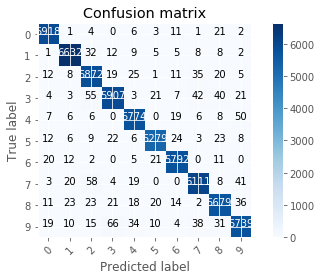

In [39]:
cm_train = confusion_matrix(y_train, y_train_pred)
plot_confusion_matrix(cm_train, [i for i in range(10)])